In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 7.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1f813ea7420bc073ab8198aa378e6b937144a843d11f4dab80440ac6d7b0fc3e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


### **1. Create Column Class Object**

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark=SparkSession.builder.appName('silambarasan').getOrCreate()

In [ ]:
columns=['Seqno',"Quote"]

In [ ]:
data = [("1", "Be the change that you wish to see in the world"),
    ("2", "Everyone thinks of changing the world, but no one thinks of changing himself."),
    ("3", "The purpose of our lives is to be happy."),
    ("4", "Be cool.")]

In [ ]:
df=spark.createDataFrame(data=data,schema=columns)

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
colObj=lit('silambarasan')

In [ ]:
data=[("James",23),("Ann",40)]
df=spark.createDataFrame(data).toDF("name.fname","gender")
df.printSchema()

root
 |-- name.fname: string (nullable = true)
 |-- gender: long (nullable = true)



In [ ]:
# Using DataFrame object (df)
df.select(df.gender).show()

+------+
|gender|
+------+
|    23|
|    40|
+------+



In [ ]:
df.select(df["gender"]).show()

+------+
|gender|
+------+
|    23|
|    40|
+------+



In [ ]:
#Accessing column name with dot (with backticks)
df.select(df["`name.fname`"]).show()

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+



In [ ]:
#Using SQL col() function
from pyspark.sql.functions import col
df.select(col("gender")).show()

+------+
|gender|
+------+
|    23|
|    40|
+------+



In [ ]:
#Accessing column name with dot (with backticks)
df.select(col("`name.fname`")).show()

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+



In [ ]:
#Create DataFrame with struct using Row class
from pyspark.sql import Row

In [ ]:
data=[Row(name="James",prop=Row(hair="black",eye="blue")),
      Row(name="Ann",prop=Row(hair="grey",eye="black"))]
df=spark.createDataFrame(data)
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



In [ ]:
df.show()

+-----+-------------+
| name|         prop|
+-----+-------------+
|James|{black, blue}|
|  Ann|{grey, black}|
+-----+-------------+



In [ ]:
#Access struct column
df.select(df.prop.hair).show()

+---------+
|prop.hair|
+---------+
|    black|
|     grey|
+---------+



In [ ]:
df.select(df["prop.hair"]).show()

+-----+
| hair|
+-----+
|black|
| grey|
+-----+



In [ ]:
df.select(col("prop.hair")).show()

+-----+
| hair|
+-----+
|black|
| grey|
+-----+



In [ ]:
#Access all columns from struct
df.select(col("prop.*")).show()

+-----+-----+
| hair|  eye|
+-----+-----+
|black| blue|
| grey|black|
+-----+-----+



### **2. PySpark Column Operators**

In [ ]:
data=[(100,2,1),(200,3,4),(300,4,4)]
df=spark.createDataFrame(data).toDF("col1","col2","col3")

In [ ]:
df.show(truncate=False)

+----+----+----+
|col1|col2|col3|
+----+----+----+
|100 |2   |1   |
|200 |3   |4   |
|300 |4   |4   |
+----+----+----+



In [ ]:
#Arthmetic operations
df.select(df.col1 + df.col2).show()

+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+



In [ ]:
df.select(df.col1 - df.col2).show()
df.select(df.col1 * df.col2).show()
df.select(df.col1 / df.col2).show()
df.select(df.col1 % df.col2).show()

+-------------+
|(col1 - col2)|
+-------------+
|           98|
|          197|
|          296|
+-------------+

+-------------+
|(col1 * col2)|
+-------------+
|          200|
|          600|
|         1200|
+-------------+

+-----------------+
|    (col1 / col2)|
+-----------------+
|             50.0|
|66.66666666666667|
|             75.0|
+-----------------+

+-------------+
|(col1 % col2)|
+-------------+
|            0|
|            2|
|            0|
+-------------+



In [ ]:
df.select(df.col2 > df.col3).show()
df.select(df.col2 < df.col3).show()
df.select(df.col2 == df.col3).show()

+-------------+
|(col2 > col3)|
+-------------+
|         true|
|        false|
|        false|
+-------------+

+-------------+
|(col2 < col3)|
+-------------+
|        false|
|         true|
|        false|
+-------------+

+-------------+
|(col2 = col3)|
+-------------+
|        false|
|        false|
|         true|
+-------------+



### **3. PySpark Column Functions**

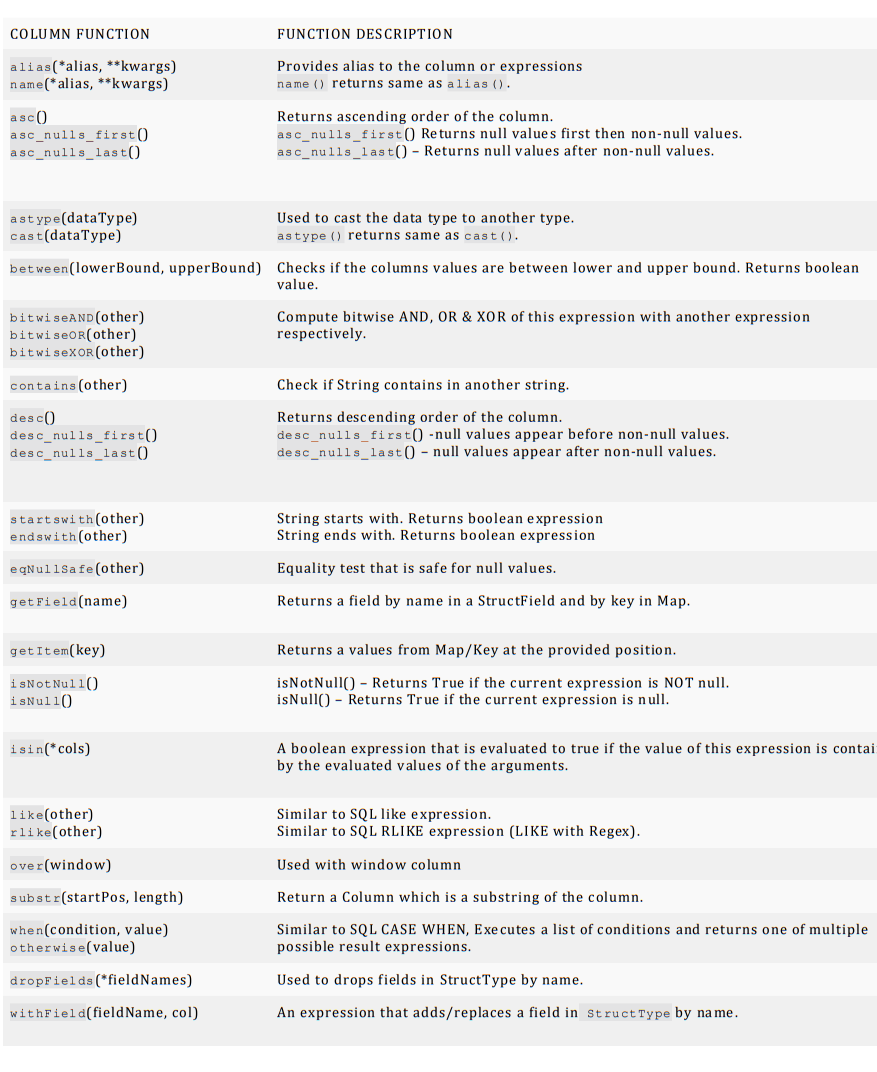

### **4. PySpark Column Functions Examples**

In [ ]:
data=[("James","Bond","100",None),
      ("Ann","Varsa","200",'F'),
      ("Tom Cruise","XXX","400",''),
      ("Tom Brand",None,"400",'M')]
columns=["fname","lname","id","gender"]
df=spark.createDataFrame(data,columns)

In [ ]:
df.show(truncate=False)

+----------+-----+---+------+
|fname     |lname|id |gender|
+----------+-----+---+------+
|James     |Bond |100|null  |
|Ann       |Varsa|200|F     |
|Tom Cruise|XXX  |400|      |
|Tom Brand |null |400|M     |
+----------+-----+---+------+



### 4.1 alias() – Set’s name to Column

In [ ]:
from pyspark.sql.functions import expr

In [ ]:
df.select(df.fname.alias("first_name"), \
          df.lname.alias("last_name")
   ).show()


+----------+---------+
|first_name|last_name|
+----------+---------+
|     James|     Bond|
|       Ann|    Varsa|
|Tom Cruise|      XXX|
| Tom Brand|     null|
+----------+---------+



In [ ]:
#Another example
df.select(expr(" fname ||','|| lname").alias("fullName") \
   ).show()

+--------------+
|      fullName|
+--------------+
|    James,Bond|
|     Ann,Varsa|
|Tom Cruise,XXX|
|          null|
+--------------+



##### 4.2 asc() & desc() – Sort the DataFrame columns by Ascending or Descending order.

In [ ]:
#asc, desc to sort ascending and descending order repsectively.
df.sort(df.fname.asc()).show()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|       Ann|Varsa|200|     F|
|     James| Bond|100|  null|
| Tom Brand| null|400|     M|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



In [ ]:
df.sort(df.fname.desc()).show()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
+----------+-----+---+------+



##### 4.3 cast() & astype() – Used to convert the data Type.

In [ ]:
#cast
df.select(df.fname,df.id.cast("int")).printSchema()

root
 |-- fname: string (nullable = true)
 |-- id: integer (nullable = true)



##### 4.4 between() – Returns a Boolean expression when a column values in between lower and upper bound.

In [ ]:
#between
df.filter(df.id.between(100,300)).show()

+-----+-----+---+------+
|fname|lname| id|gender|
+-----+-----+---+------+
|James| Bond|100|  null|
|  Ann|Varsa|200|     F|
+-----+-----+---+------+



##### 4.5 contains() – Checks if a DataFrame column value contains a a value specified in this function.

In [ ]:

#contains
df.filter(df.fname.contains("Cruise")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



##### 4.6 startswith() & endswith() – Checks if the value of the DataFrame Column starts and ends with a String respectively

In [ ]:
#startswith, endswith()
df.filter(df.fname.startswith("T")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
+----------+-----+---+------+



In [ ]:
df.filter(df.fname.endswith("Cruise")).show()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



##### 4.7 eqNullSafe()

##### 4.8 isNull & isNotNull() – Checks if the DataFrame column has NULL or non NULL values.

In [ ]:
  #isNull & isNotNull
df.filter(df.lname.isNull()).show()

+---------+-----+---+------+
|    fname|lname| id|gender|
+---------+-----+---+------+
|Tom Brand| null|400|     M|
+---------+-----+---+------+



In [ ]:
df.filter(df.lname.isNotNull()).show()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



##### 4.9 like() & rlike() – Similar to SQL LIKE expression

In [ ]:
#like , rlike
df.select(df.fname,df.lname,df.id).filter(df.fname.like("%nd")).show()

+---------+-----+---+
|    fname|lname| id|
+---------+-----+---+
|Tom Brand| null|400|
+---------+-----+---+



##### 4.10 substr() – Returns a Column after getting sub string from the Column

In [ ]:

df.select(df.fname.substr(1,2).alias("substr")).show()

+------+
|substr|
+------+
|    Ja|
|    An|
|    To|
|    To|
+------+



4.11 when() & otherwise() – It is similar to SQL Case When, executes sequence of expressions until it matches the condition and returns a value when match.

In [ ]:
#when & otherwise
from pyspark.sql.functions import when

In [ ]:
df.select(df.fname,df.lname,when(df.gender=="M","Male") \
              .when(df.gender=="F","Female") \
              .when(df.gender==None ,"") \
              .otherwise(df.gender).alias("new_gender") \
    ).show()

+----------+-----+----------+
|     fname|lname|new_gender|
+----------+-----+----------+
|     James| Bond|      null|
|       Ann|Varsa|    Female|
|Tom Cruise|  XXX|          |
| Tom Brand| null|      Male|
+----------+-----+----------+



4.12 isin() – Check if value presents in a List.

In [ ]:
#isin
li=["100","200"]
df.select(df.fname,df.lname,df.id) \
  .filter(df.id.isin(li)) \
  .show()

+-----+-----+---+
|fname|lname| id|
+-----+-----+---+
|James| Bond|100|
|  Ann|Varsa|200|
+-----+-----+---+



4.13 getField() – To get the value by key from MapType column and by stuct child name from StructType column

In [ ]:
#Create DataFrame with struct, array & map
from pyspark.sql.types import StructType,StructField,StringType,ArrayType,MapType
data=[(("James","Bond"),["Java","C#"],{'hair':'black','eye':'brown'}),
      (("Ann","Varsa"),[".NET","Python"],{'hair':'brown','eye':'black'}),
      (("Tom Cruise",""),["Python","Scala"],{'hair':'red','eye':'grey'}),
      (("Tom Brand",None),["Perl","Ruby"],{'hair':'black','eye':'blue'})]

schema = StructType([
        StructField('name', StructType([
            StructField('fname', StringType(), True),
            StructField('lname', StringType(), True)])),
        StructField('languages', ArrayType(StringType()),True),
        StructField('properties', MapType(StringType(),StringType()),True)
     ])
df=spark.createDataFrame(data,schema)
df.printSchema()

root
 |-- name: struct (nullable = true)
 |    |-- fname: string (nullable = true)
 |    |-- lname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [ ]:
#getField from MapType
df.select(df.properties.getField("hair")).show()

+----------------+
|properties[hair]|
+----------------+
|           black|
|           brown|
|             red|
|           black|
+----------------+



In [ ]:
#getField from Struct
df.select(df.name.getField("fname")).show()

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
|Tom Cruise|
| Tom Brand|
+----------+



4.14 getItem() – To get the value by index from MapType or ArrayTupe & ny key for MapType column.

In [ ]:
#getItem() used with ArrayType
df.select(df.languages.getItem(1)).show()

+------------+
|languages[1]|
+------------+
|          C#|
|      Python|
|       Scala|
|        Ruby|
+------------+



4.15 dropFields

4.16 withField()

4.17 over() – Used with Window Functions
